In [7]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

from mydedalustools import *    
import h5py

%load_ext autoreload
%autoreload 2

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24
Kelvin = 1

In [13]:
snapshots_2level_T42_10_200_linear  = open_h5s_wgauge('snapshots_2level_T42_locked_10_p02_200_p05_linear',('s1','s2'))


In [73]:
snapshots_2level_T42_10_200 = open_h5s_wgauge('snapshots_2level_T42_locked_10_p02_200_p05',('s1','s2'))


In [56]:
snapshots_2level_T42_10_200_linear_drag  = open_h5s_wgauge('snapshots_2level_T42_locked_10_p02_200_p05_linear_drag',('s1','s2'))


In [93]:
snapshots_2level_T42_10_200_linear_drag_coslon  = open_h5s_wgauge('snapshots_2level_T42_locked_10_p02_200_p05_linear_drag_coslon',('s1',))


In [10]:
# Earth parameters
R_E = 6.4e6*meter
Omega_E = 2*np.pi/86400 / second
Omega = Omega_E
R = R_E
# Set Parameters
Ro_T = 10.
E = 0.02
tau_rad_nondim = 200
# Diagnostic Parameters
taurad = tau_rad_nondim/(2*Omega)
taudrag = 1/(2*Omega*E)

In [68]:
def plot_one_theta_wind(ax,theta,wind,vmin=300,vmax=370,cmap = plt.cm.viridis,scale=None,wind_disc=1):
        ((theta)/Kelvin).plot.contourf(ax=ax,y='latitude',levels=18,cmap=cmap,vmin=vmin,vmax=vmax)
        n=2*wind_disc;m=wind_disc
        ax.quiver(wind.longitude[::n],
                  wind.latitude[1::m] ,
                  wind[0][::n,1::m].T,
                  -wind[1][::n,1::m].T,
                  scale=scale)

def plot_theta_wind(theta,wind,title,vmin=300,vmax=370,cmap = plt.cm.viridis,scale=None,wind_disc=1,ndays_avg=30):
    _,axs=plt.subplots(2,3,figsize=(20,10))
    axs=axs.reshape(-1)
    for i,time in enumerate(np.linspace(0,len(theta.t)-1,6)):
        if i>4:
            break
        time=int(time)
        plot_one_theta_wind(axs[i],theta[time],wind[time],vmin,vmax,cmap,scale,wind_disc)
        axs[i].set_title("time = %.1f days"%sol.day[time])
    plot_one_theta_wind(axs[-1],theta[-ndays_avg*4:].mean('t'),wind[-ndays_avg*4:].mean('t'),vmin,vmax,cmap,scale,wind_disc)
    axs[-1].set_title("avg last %i days"%ndays_avg)
    plt.suptitle(title,fontsize=25)
    


# General characteristics

Text(0.5, 1.0, '$[u_1]$ and $[u_2]$ at the equator vs time')

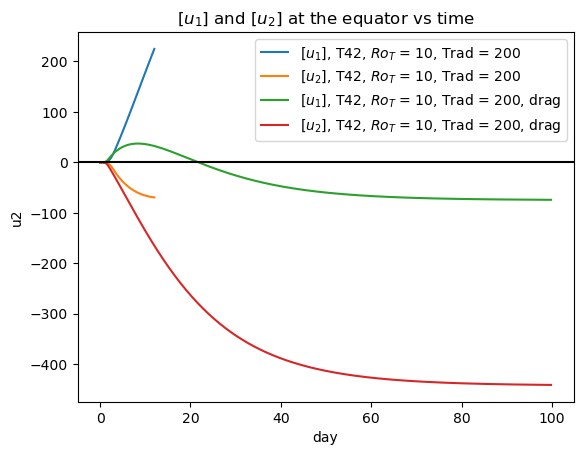

In [57]:
def zonalmeanu1_eq(u):
    return u[:,0].sel(latitude=slice(-1.4,1.4)).mean(('latitude','longitude'))/(meter/second)
zonalmeanu1_eq(snapshots_2level_T42_10_200_linear.u1).plot(x='day',label=r'$[u_1]$, T42, $Ro_T$ = 10, Trad = 200')
zonalmeanu1_eq(snapshots_2level_T42_10_200_linear.u2).plot(x='day',label=r'$[u_2]$, T42, $Ro_T$ = 10, Trad = 200')

zonalmeanu1_eq(snapshots_2level_T42_10_200_linear_drag.u1).plot(x='day',label=r'$[u_1]$, T42, $Ro_T$ = 10, Trad = 200, drag')
zonalmeanu1_eq(snapshots_2level_T42_10_200_linear_drag.u2).plot(x='day',label=r'$[u_2]$, T42, $Ro_T$ = 10, Trad = 200, drag')
plt.axhline(0.,color='k')

plt.legend()
plt.title(r'$[u_1]$ and $[u_2]$ at the equator vs time')
#plt.xlim(0,10)

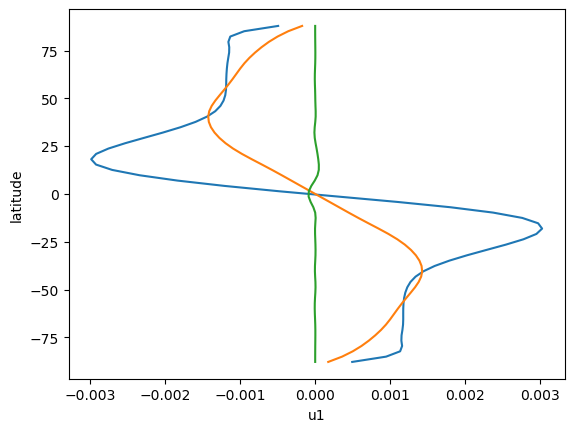

In [94]:
snapshots_2level_T42_10_200_linear_drag.u1[:,1].sel(t=slice(0*24,1*24)).mean(('t','longitude')).plot(y='latitude')
snapshots_2level_T42_10_200.u1[:,1].sel(t=slice(0*24,1*24)).mean(('t','longitude')).plot(y='latitude')
snapshots_2level_T42_10_200_linear_drag_coslon.u1[:,1].sel(t=slice(0*24,1*24)).mean(('t','longitude')).plot(y='latitude')


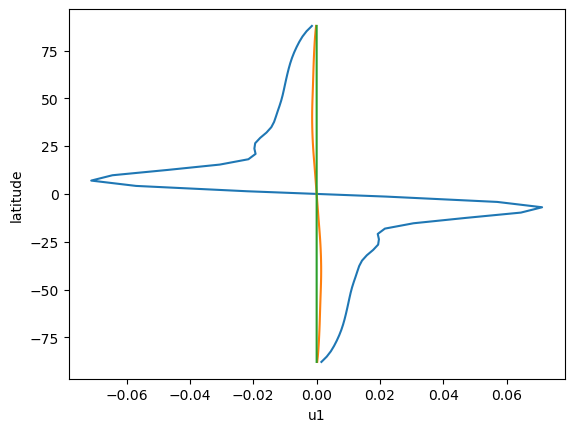

In [95]:
snapshots_2level_T42_10_200_linear_drag.u1[:,1].isel(t=slice(-2,-1)).mean(('t','longitude')).plot(y='latitude')
snapshots_2level_T42_10_200.u1[:,1].sel(t=slice(0*24,1*24)).mean(('t','longitude')).plot(y='latitude')
snapshots_2level_T42_10_200_linear_drag_coslon.u1[:,1].isel(t=slice(-2,-1)).mean(('t','longitude')).plot(y='latitude')


Text(0.5, 1.0, '$[u_2]$')

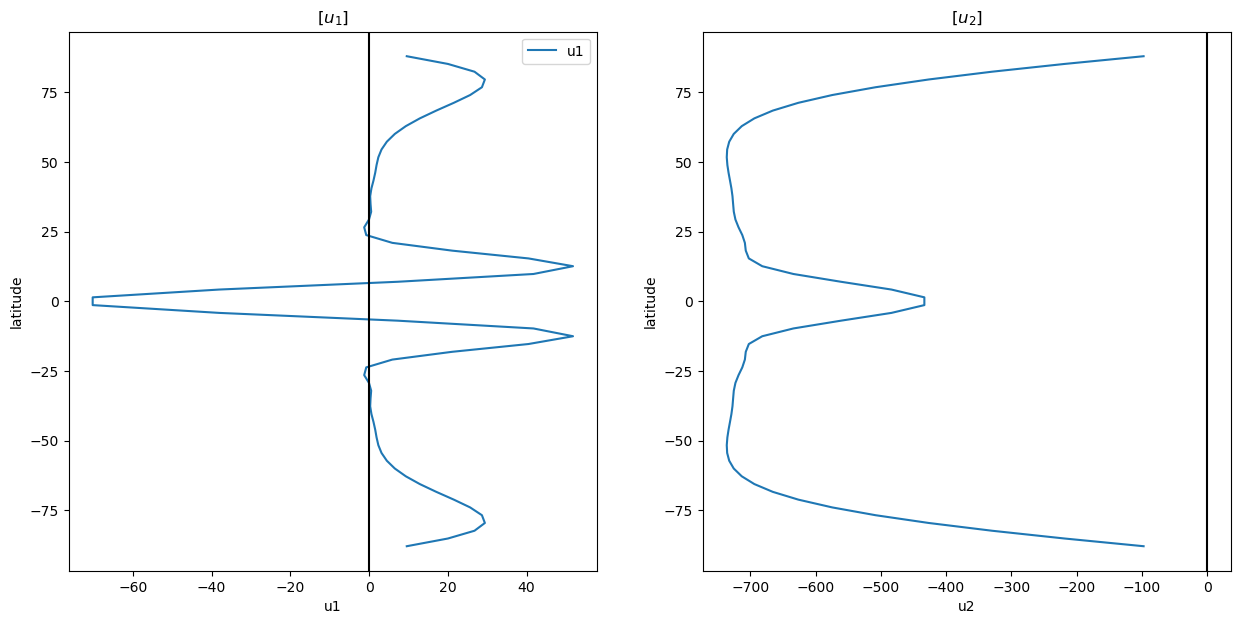

In [61]:
def zonalmean(u):
    return u.mean(('t','longitude'))/(meter/second)
_,axs = plt.subplots(1,2,figsize=(15,7))
sim=snapshots_2level_T42_10_200_linear_drag
final_zonalmean(sim.u1[:,0]).plot(ax=axs[0],y='latitude',label='u1')
final_zonalmean(sim.u2[:,0]).plot(ax=axs[1],y='latitude',label='u2')
axs[0].axvline(0.,color='k')
axs[1].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$')
axs[1].set_title(r'$[u_2]$')

# $\theta$ & wind global structure

Text(0.5, 1.0, 'Avg days 170-200')

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


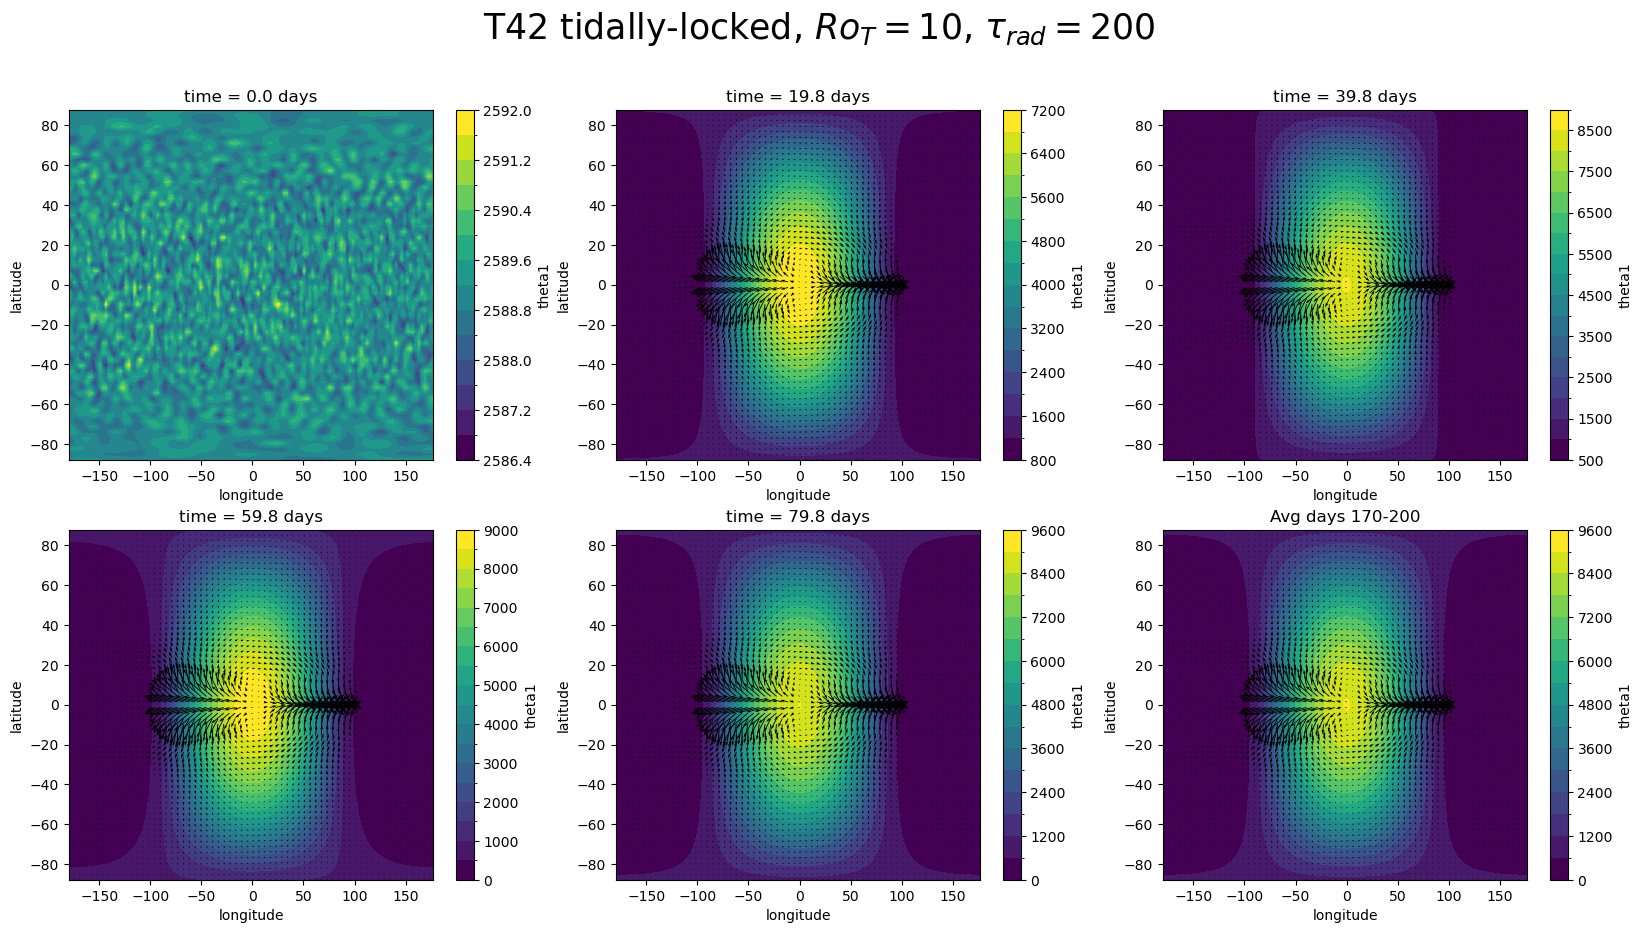

In [66]:
sol=snapshots_2level_T42_10_200_linear_drag
plot_theta_wind(sol.theta1,sol.u1,r'T42 tidally-locked, $Ro_T=10$, $\tau_{rad} = 200$',vmin=None,vmax=None)
#sol.theta1E[0].plot.contour(y='latitude',levels=np.linspace(10,sol.theta1E[0].max(),5))
plt.title("Avg days 170-200")

# Composites

Text(0.5, 0.98, 'Wavenumber 1 geopotential and winds in upper and lower layers, day 0-300')

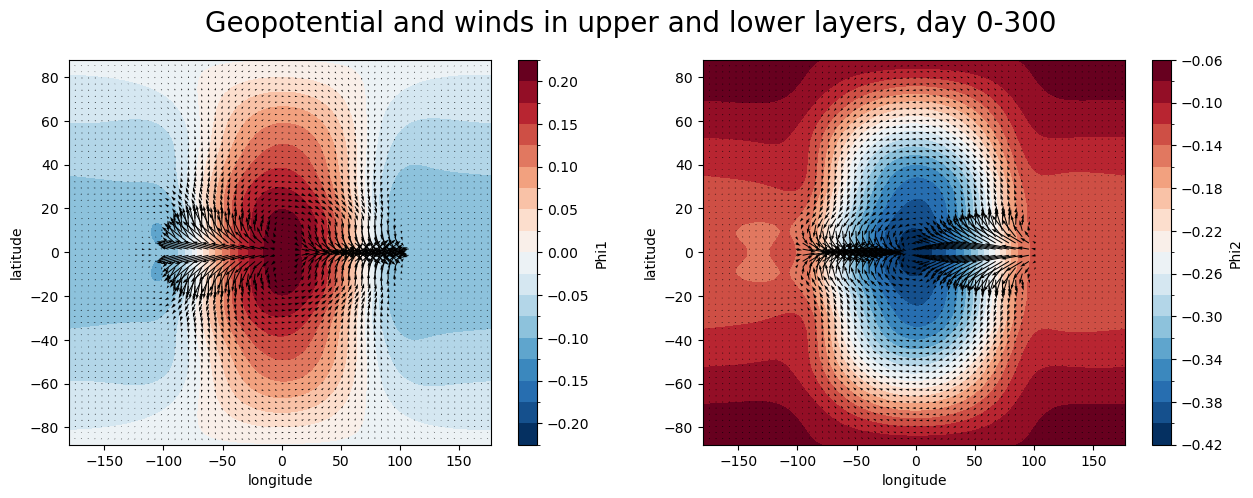

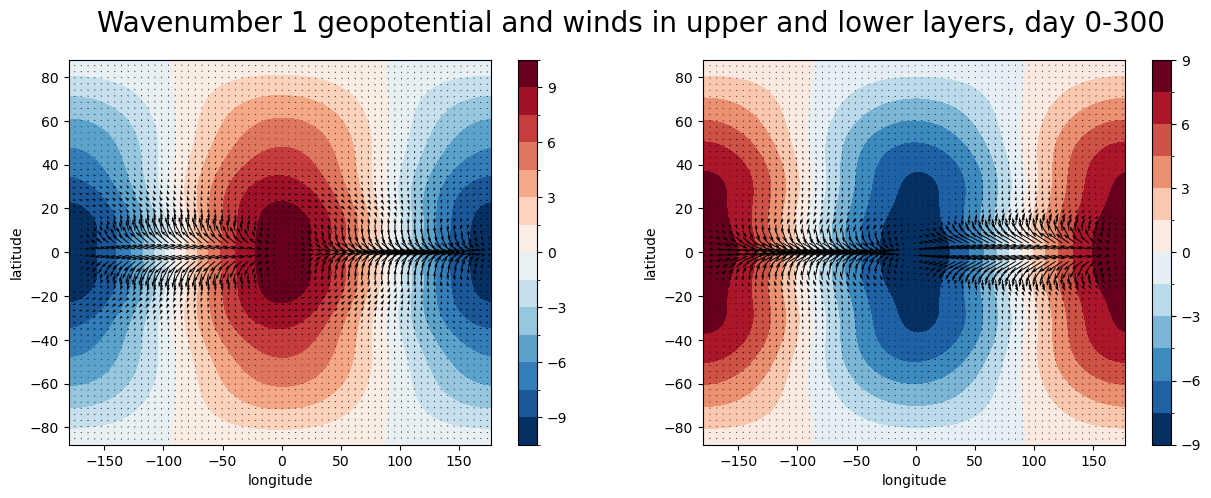

In [72]:
plot_composites(snapshots_2level_T42_10_200_linear_drag)
plt.suptitle("Geopotential and winds in upper and lower layers, day 0-300",fontsize=20)
plot_composites_modek(snapshots_2level_T42_10_200_linear_drag,1)
plt.suptitle("Wavenumber 1 geopotential and winds in upper and lower layers, day 0-300",fontsize=20)

In [179]:
testaxi = open_h5s_wgauge('snapshots_TEST_axi',('s1',))
testlocked = open_h5s_wgauge('snapshots_TEST_locked',('s1',))
testsemilocked = open_h5s_wgauge('snapshots_TEST_semilocked',('s1',))
#testsemilocked2 = open_h5s_wgauge('snapshots_TEST_semilocked2',('s1',))

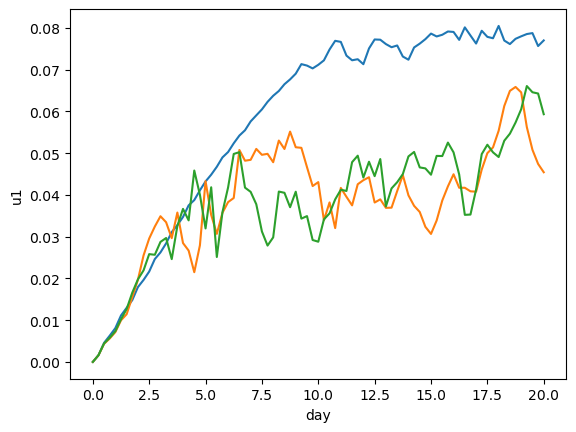

In [180]:
testaxi.u1[:,0].mean(('latitude','longitude')).plot(x='day')
testlocked.u1[:,0].mean(('latitude','longitude')).plot(x='day')
testsemilocked.u1[:,0].mean(('latitude','longitude')).plot(x='day')

Text(0.5, 1.0, '$[u_2]$')

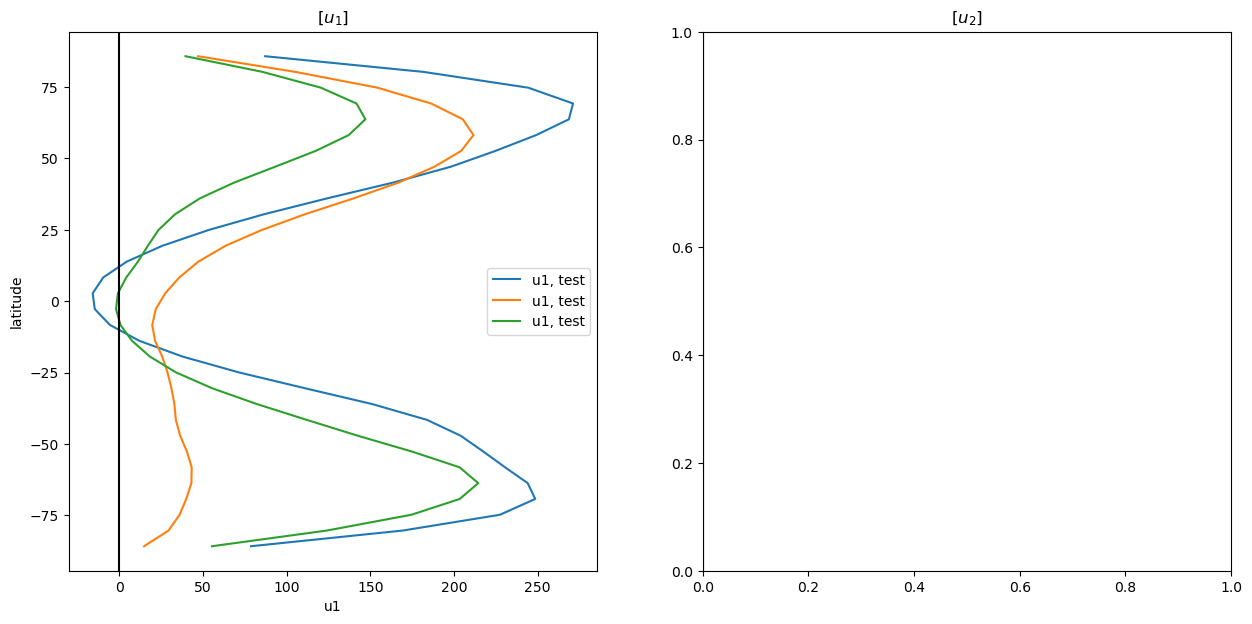

In [181]:
def zonalmean(u):
    return u.mean(('t','longitude'))/(meter/second)
_,axs = plt.subplots(1,2,figsize=(15,7))
final_zonalmean(testaxi.u1[:,0].sel(t=slice(240,480))).plot(ax=axs[0],y='latitude',label='u1, test')
final_zonalmean(testlocked.u1[:,0].sel(t=slice(240,480))).plot(ax=axs[0],y='latitude',label='u1, test')
final_zonalmean(testsemilocked.u1[:,0].sel(t=slice(240,480))).plot(ax=axs[0],y='latitude',label='u1, test')
axs[0].axvline(0.,color='k')
axs[1].axvline(0.,color='k')
axs[0].legend()
axs[0].set_title(r'$[u_1]$')
axs[1].set_title(r'$[u_2]$')